# Аналитика для маркетигового отдела

* * * 

## Оглавление 

#### [Шаг 1. Загрузим данные и подготовим их к анализу](#Шаг1)
####  [Шаг 2. Построим отчёты и посчитаем метрики](#Шаг2)
####  [Шаг 3. Напишем общий вывод:](#Шаг3)

* * * 

<a id='Шаг1'></a>

### Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
# Импортируем библиотеки , которые могут понадобиться в проекте
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# прочитаем файлы и сохраним их в переменных visits, orders и costs соответсвтенно
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
# выведем саму таблицу visits и общую информацию о ней
display(visits)
print()
print(visits.info())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


* В таблице visits отсутсвуют пропущенные значения, однако столбцы End Ts, Start Ts и Uid необходимо привести к корректному типу данных.Также избавимся от заглавных букв и пробелов в названиях столбцов.

In [4]:
# передаем список с новыми названиями в .columns[] 
visits.columns = ['device','end_ts','source_id','start_ts','uid']

In [5]:
# приведем end_ts и start_ts к типу datetime так как они содержат в себе дату
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
# 'uid' приведем к типу object тк это уникальный номер, обезопасим себя от арифметических действий с этим столбцом
visits['uid'] = visits['uid'].astype('object')

In [6]:
# выведем таблицу orders и общую информацию о ней
display(orders)
print()
print(orders.info())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


* Пропущенных значений также нет.Переименуем столбцы и приведем 'Buy Ts' и 'Uid' к нужным типам.

In [7]:
# передаем список с новыми названиями в .columns[] 
orders.columns = ['buy_ts','revenue','uid']

In [8]:
# приведем buy_ts к типу datetime так как он содержит в себе дату
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
# 'uid' приведем к типу object тк это уникальный номер, обезопасим себя от арифметических действий с этим столбцом
orders['uid'] = orders['uid'].astype('object')

In [9]:
# выведем таблицу costs и общую информацию о ней
display(costs)
print()
print(costs.info())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


* Пропущенных значений нет. Приведем столбец 'dt' к нужному типу

In [10]:
# приведем dt к типу datetime так как он содержит в себе дату
costs['dt'] = pd.to_datetime(costs['dt'])

### Вывод:

В рамках первого шага :
* импортировали библиотеки
* открыли файлы и изучили общую информацию 
* выяснили , что таблицы не содержат пропущенных значений 
* переименовали столбцы(избавились от пробелов и заглавных букв)
* привели столбцы к правильному типу 
* подготовили данные к дальнейшему анализу.

<a id='Шаг2'></a>

### Шаг 2. Построим отчёты и посчитаем метрики

Чтобы посмотреть на имеющуюся активность пользователей, рассчитаем метрики DAU, WAU и MAU. Каждая из них покажет:
* DAU — среднее количество уникальных пользователей в день
* WAU — среднее количество уникальных пользователей в неделю
* MAU — среднее количество уникальных пользователей в месяц.

In [12]:
# группируем по нужной временной величине и считаем количество уникальных 'uid'
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [13]:
# выведем метрики в целом типе 
print('DAU:',int(dau))
print('WAU:',int(wau))
print('MAU:',int(mau))

DAU: 907
WAU: 5716
MAU: 23228


* То есть имеем в среднем 907 посетителей на сайте в день , 5716 посетителей в неделю и 23228 в месяц.

* Визуализиурем метрики и посмотрим на них в динамике времени.

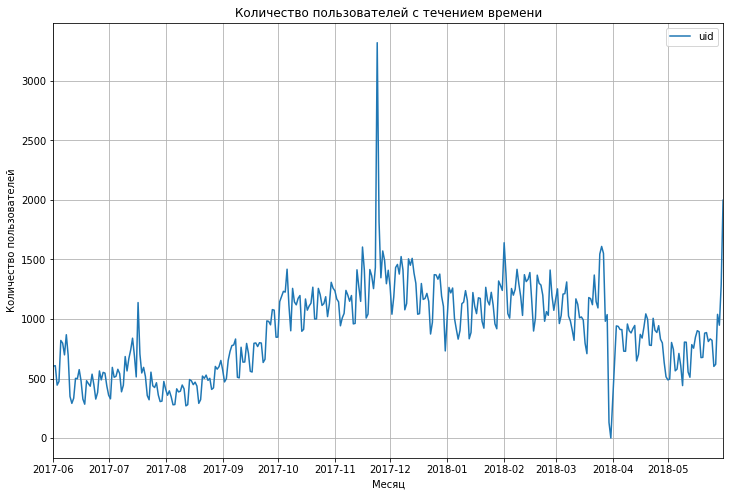

In [14]:
dau_1 = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
dau_1.plot(kind='line',x = 'session_date',y = 'uid',figsize=(12,8),grid=True)
plt.xlabel('Месяц')
plt.title('Количество пользователей с течением времени')
plt.ylabel('Количество пользователей');

* Наблюдаем некую сезонность в посещении сайта: ближе к концу года(начиная с октября) и в его первом месяце посещаемость наибольшая. Возможно это связано с праздниками и появлением мероприятий, приуроченных к ним и более активной закупкой трафика, рекламными компаниями.Также странно выглядит падение посещаемости до нуля в апреле,это может обьясняться техническими работами или неполадками на сайте.

* Построим на эти же метрики по устройствам, c которых была соверешена пользовательская сессия

In [15]:
# посмотрим сколько уникальных значениц по столбцу
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [16]:
# создаем два среза по каждому типу девайсов
touch = visits.query('device == "touch"')
desktop = visits.query('device == "desktop"')

In [17]:
# группируем по нужной временной величине и считаем количество уникальных 'uid' по каждому девайсу
dau_touch = touch.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_touch = touch.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_touch = touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

# выведем метрики в целом типе 
print('DAU по touch:',int(dau_touch))
print('WAU по touch:',int(wau_touch))
print('MAU по touch:',int(mau_touch))
print()
dau_desktop = desktop.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_desktop = desktop.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_desktop = desktop.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

# выведем метрики в целом типе 
print('DAU по desktop:',int(dau_desktop))
print('WAU по desktop:',int(wau_desktop))
print('MAU по desktop:',int(mau_desktop))

DAU по touch: 252
WAU по touch: 1634
MAU по touch: 6825

DAU по desktop: 659
WAU по desktop: 4129
MAU по desktop: 16724


* По всем трем метрикам видно, что в среднем в день, неделю и месяц , пользователей с desktop-девайсов заходит более чем в 2 раза больше , чем пользователей с touch-девайсов

* Разделим число сессий на количество пользователей за период

In [18]:
# чтобы узнать сколько сессий приходится на одного пользователья за день, разделим число сессий на количество пользователей 
sessions_per_user = visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sessions_per_user'].describe()
mean = sessions_per_user['sessions_per_user'].mean()
print('Один пользователь в среднем совершает сессий в день:',int(mean))

Один пользователь в среднем совершает сессий в день: 1


* Теперь расчитаем метрику ASL, которая показывает, сколько длится сессия пользователя в среднем.

In [19]:
# посчитаем длину всех сессий и вычислим среднее
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


* Построим гистограмму и посмотрим на реальное распределение продолжительности

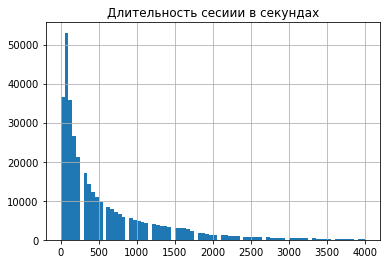

In [20]:
visits['session_duration_sec'].hist(bins=80,range=(0,4000)).set_title('Длительность сесиии в секундах');

* Распределение далеко от нормального - такие показатели, как среднее и медиана будут нерепрезентативными .Для нашего случая лучше подходит мода, то есть самое часто встречающееся значение.

In [21]:
# выведем моду
visits['session_duration_sec'].mode()

0    60
dtype: int64


* Большинство посетителей проводит на нашем сайте 1 минуту.

* Посчитаем эту же метрику для каждого типа дейсов 

In [22]:
print('Число сессий с touch девайсов:',len(touch))
print('Число сессий с desktop девайсов:',len(desktop))

Число сессий с touch девайсов: 96833
Число сессий с desktop девайсов: 262567


* Большинство пользовательских визитов на наш сайт было совершено с компьютеров.

In [23]:
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [24]:
touch

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018,4,17,2018-04-23
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2,7,2018-02-12
...,...,...,...,...,...,...,...,...,...
359386,touch,2017-09-15 21:14:19,2,2017-09-15 21:14:00,18176348973341832326,2017,9,37,2017-09-15
359391,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866,2017,8,35,2017-08-30
359394,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046,2017,11,45,2017-11-06
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


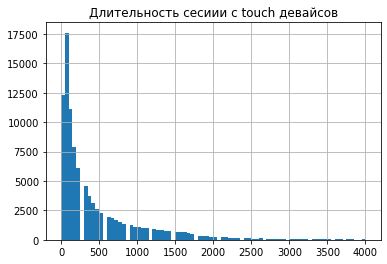

Text(0.5, 1.0, 'Длительность сесиии с desktop девайсов')

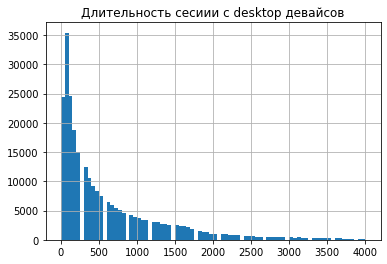

In [25]:
# посмотрим на длину сессий в секундах по каждому из девайсов
touch['session_duration_sec'] = (touch['end_ts'] - touch['start_ts']).dt.seconds
desktop['session_duration_sec'] = (desktop['end_ts'] - desktop['start_ts']).dt.seconds
touch['session_duration_sec'].hist(bins=80,range=(0,4000)).set_title('Длительность сесиии с touch девайсов')
plt.show()
desktop['session_duration_sec'].hist(bins=80,range=(0,4000)).set_title('Длительность сесиии с desktop девайсов')

* Распределение по desktop и touch по форме схожи. Сессий с desktop девайсов не только более чем в два раза больше, чем сессий с touch девайсов, но большинство desktop-сессий еще и длится в два раза дольше.

* Для ответа на этот вопрос посчитаем метрику Retention Rate, которая показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

* Определим событие и период, сформируем когорту.

In [26]:
# возьмём дату, когда пользователь впервые проявил активность на сайте
first_visit = visits.groupby(['uid'])['start_ts'].min()
first_visit.name = 'first_visit'
# объединим с исходным датафреймом
visits = visits.join(first_visit, on = 'uid')
# формируем когорту за месяц 
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
#рассчитаем lifetime пользователей когорты
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round()
# cгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей в месяц
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# найдём исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
# переименуем 
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
# объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

* Рассчитаем Retention Rate

In [27]:
# разделим количество активных пользователей в каждый месяц на исходное число пользователей в нашей когорте
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
# создадим сводную таблицу и выведем ее
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
display(retention_pivot)

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Создадим тепловую карту

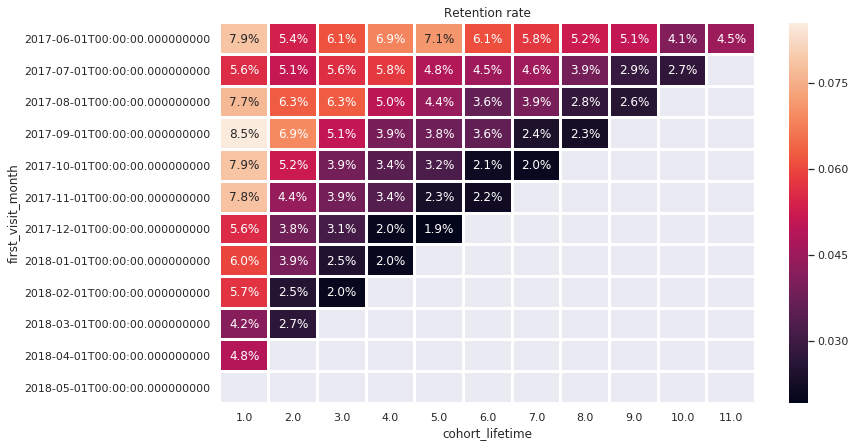

In [28]:
sns.set(style='dark')
plt.figure(figsize=(12, 7))
plt.title('Retention rate')
sns.heatmap(retention_pivot.iloc[:,1:], annot=True, fmt='.1%', linewidths=2, linecolor='white');

* Retention Rate в первую неделю заметно убывает по когортам пришедшим после декабря. Если для когорты пользователей, пришедших в июле Retention Rate в первую неделю составляет 7.9%(видимо лучше всего мы привлекали пользователей во второй половине года), то для пользователей, пришедших после декабря — уже 5.6%. Так, за 6 месяцев коэффициент удержания упал более чем на 2.5 %. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки. Это также подтвеждает сезонность.

* Вычислим первый день посещения сайта, день первого заказа и для них найдем разницу. Посмотрим на распределение

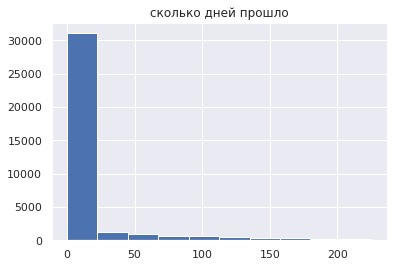

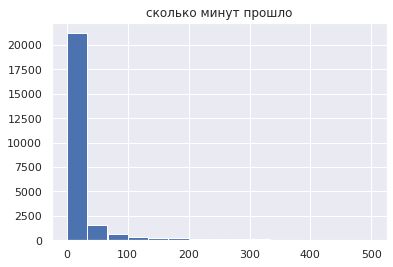

In [29]:
# получаем первый день заказа
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')
first_orders_1 = orders.groupby('uid').agg({'order_date': 'min'}).reset_index()
first_orders_1.columns = ['uid', 'first_order_date']
# получаем первый день посещения сайта
visits['visit_date'] = visits['start_ts'].astype('datetime64[D]')
first_visits_1 = visits.groupby('uid').agg({'visit_date': 'min'}).reset_index()
first_visits_1.columns = ['uid', 'first_visit_date']
# обьединяем таблицы
visits_orders = pd.merge(first_visits_1,first_orders_1, on='uid')
visits_orders['days_spent'] = visits_orders['first_order_date'] - visits_orders['first_visit_date']
visits_orders['days_spent'] = visits_orders['days_spent'] / np.timedelta64(1,'D')
visits_orders['days_spent'] = visits_orders['days_spent'].round()
#display(visits_orders.head(10))
#print()
visits_orders['days_spent'].hist(bins=10,range=(0,225)).set_title('сколько дней прошло')
plt.show();
print()
first_orders_2 = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders_2.columns = ['uid', 'first_order']
# получаем первый день посещения сайта
first_visits_2 = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits_2.columns = ['uid', 'first_visit']
# обьединяем таблицы
visits_orders_2 = pd.merge(first_visits_2,first_orders_2, on='uid')
visits_orders_2['min_spent'] = visits_orders_2['first_order'] - visits_orders_2['first_visit']
visits_orders_2['min_spent'] = visits_orders_2['min_spent'] / np.timedelta64(1,'m')
visits_orders_2['min_spent'] = visits_orders_2['min_spent'].round()
#display(visits_orders_2.head(10))
print()
visits_orders_2['min_spent'].hist(bins=15,range=(0,500)).set_title('сколько минут прошло')
plt.show();

* На гистограмме видно, что у большинства пользователей проходит 0-25 дней с момента первого посещения до заказа, что правдоподобно. Также есть посетители у которых c момента первого визита до заказа прошло до 175 дней, но они составляют незначительную часть от общего количества клиентов. Следует более детально изучить эту категорию и выяснить почему прошло так много времени, может были проблемы сайтом или им стоило напомнить оповещением на почту.

* На гистограмме в разбивке по минутам, прошедших с момента первого визита до покупки, видим, что у большинства посетителей сайта проходит от 0 до 20 минут между первым визитом и покупкой. Также видна очень малочисленная группа пользователей у которых проходит более 10000 минут с моммента визита до покупки. Следует изучить причины такого явления.

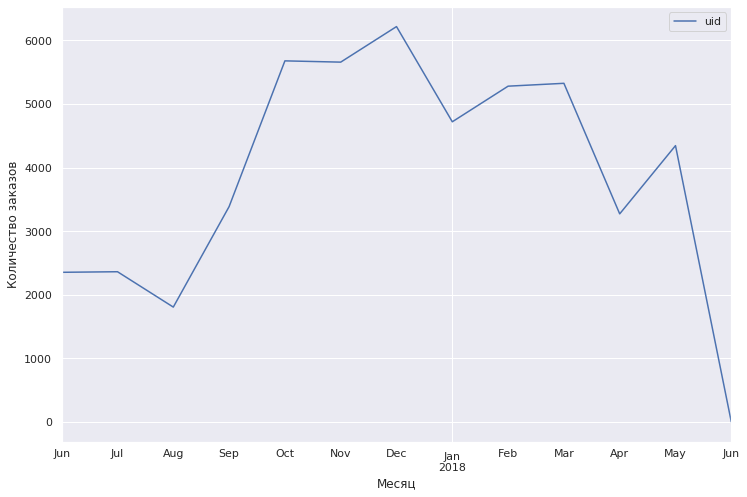

In [30]:
# извлекаем месяц заказа
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
# группируем по месяцу и находим количество уникальных пользователей
orders_2 = orders.groupby('order_month').agg({'uid':'count'}).reset_index()
orders_2.plot(kind='line',x = 'order_month',y = 'uid',figsize=(12,8),grid=True)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

* В период июль-август, количество заказов снижалось и было минимальным(до 2000 заказов в месяц). А потом в период с августа до октября, количество заказов выросло более чем в 3 раза и к декабрю достигло максимума(более 6000 заказов за месяц), после которого опять начало снижаться. Скорее всего это связано с более активной рекламной компанией и привлечением пользователей.

* Поделим общую выручку на количество заказов за месяц, посмотрим как изменялся средний чек за каждый месяц 

Text(0, 0.5, 'Средний чек')

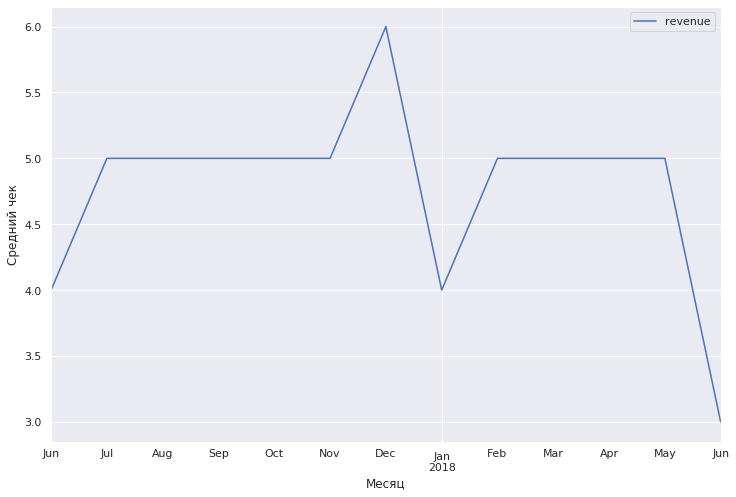

In [31]:
orders_3 = orders.groupby('order_month').agg({'revenue':'mean'}).reset_index()
orders_3['revenue'] = orders_3['revenue'].round()
orders_3.plot(kind='line',x = 'order_month',y = 'revenue',figsize=(12,8),grid=True)
plt.xlabel('Месяц')
plt.ylabel('Средний чек')

* Средний чек большую часть врмени составлял 5. В период с ноября до декабря средний чек вырос до 6 и в январе сразу упал ниже доростового уровня (2). Также заметно резкое снижение среднего чека в мае-июне до 3.

* Для ответа на это вопрос, рассчитаем метрику LTV. Она покажет итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок.

* Посчитаем LTV по когортам 

In [32]:
# формируем когорты по месяцу
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]') 
# получим месяц первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
# посчитаем количество новых покупателей 'n_buyers' за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
# добавим месяц первой покупки каждого покупателя в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')
# cгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts_1 = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
# добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts_1, on='first_order_month')
display(report)

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


* Метрику LTV считают не из выручки, а из валовой прибыли. Так как нам не дана маржинальность, мы валовую прибыль найти не можем. Примем маржинальность за единицу и фактически посчитаем LTV по выручке. LTV — относительный показатель. Посмотрим на него, в зависимости от возраста когорты 'cohort_age'

In [33]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Найдём LTV, разделив валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Визуализируем когорты в виде сводной таблицы.

In [34]:
report['ltv'] = report['gp'] / report['n_buyers']
report['ltv'] = report['ltv'].round(2)
report_final = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    
report_final = report_final.cumsum(axis=1).round(2) 
report_final.fillna('') 


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


In [35]:
report_final

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* создадим тепловую карту

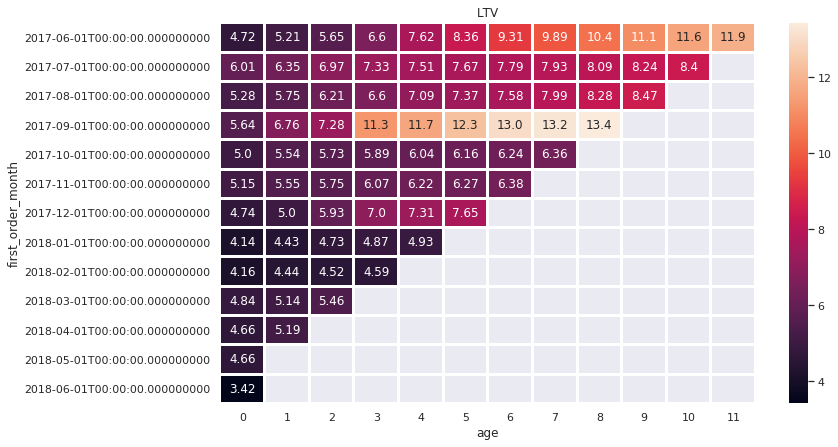

In [36]:
sns.set(style='dark')
plt.figure(figsize=(12, 7))
plt.title('LTV')
sns.heatmap(report_final, annot=True, fmt='.3', linewidths=2, linecolor='white');

* Больше всего денег пользователи когорт приносят в первый месяц, эти цифры сопоставимы со средним чеком. В последующие месяцы жизни когорты, пользователи приносят околоединичное значение. На этом фоне выделяется когорта 2017-06-01 и 2017-09-01. Пользователи этих когорт продолжали приносить доход на протяжении всего  доступного периода lifetime и увеличивали его. Возможно к ех участникам применялся какой то особый рекламный подход. Марктологам следует посмотреть, не использовали ли они что-то необычное в работе с этими когортами.LTV кагорты увеличивается с течнием времени и это хороший знак, но заметно, что у когорт, пришедших в новом году, темп роста значительно снизился.

In [37]:
print('Всего было потрачено:',int(costs['costs'].sum()))

Всего было потрачено: 329131


* Посмотрим, сколько было потрачено за все время на каждый источник

In [38]:
costs_1 = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

In [39]:
costs_1.sort_values('costs',ascending=False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


* Больше всего денег мы потратили на источники 3, 4 и 5

* Узнаем, как изменялись траты с течением времени

Text(0, 0.5, 'Затраты')

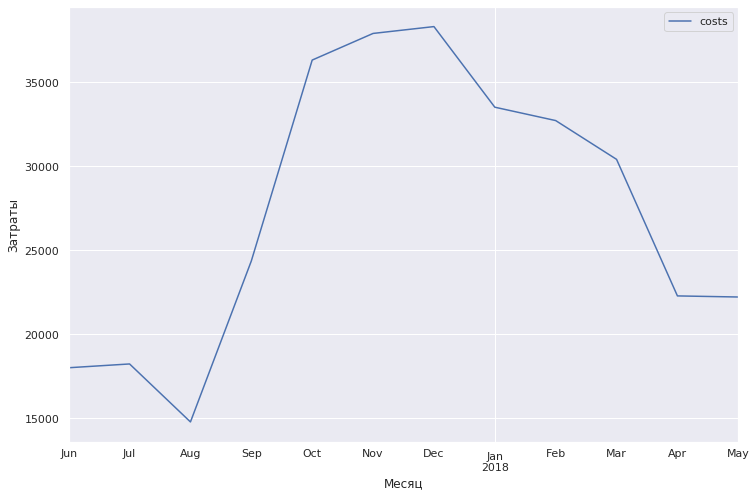

In [40]:
costs_2 = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
costs_2.plot(kind='line',x = 'month',y = 'costs',figsize=(12,8),grid=True)
plt.xlabel('Месяц')
plt.ylabel('Затраты')

* В период июль-август, затраты снижались и в августе достигли минимума. А потом в период с августа до октября выросли более чем в 4 раза и к декабрю достигли максимума, после которого опять начали снижаться.То есть больше всего тратили в период с августа до апреля. 

* Посчитаем знакомую метрику LTV, только уже в разбивке по источникам трафика

In [41]:
# находим первый источник трафика каждого юзера
first_source = visits.groupby('uid').agg({'source_id':'first'}).reset_index()
first_source.columns = ['uid', 'first_source']
# обединяем первый источник трафика с таблицей о заказах по столбцу 'id' 
source_order = pd.merge(orders,first_source, on='uid')
# добавим месяц первого заказа 
source_order_new = pd.merge(first_orders,source_order, on='uid')
# группируем табличку заказов orders по месяцу первой покупки и источнику, найдем количество людей в когортах
orders_1 = source_order_new.groupby(['first_order_month','first_source']).agg({'uid': 'nunique'}).reset_index()
orders_1.columns = ['first_order_month','first_source','n_buyers']
# сгруппируем заказы по источнику и месяцу первой покупкии и месяцу покупки, просуммируем revenue.
orders_2 = source_order_new.groupby(['first_source','first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
# объединяем по месяцу первой покупки и источнику таблицы orders_2 и orders_1
report_source = pd.merge(orders_1,orders_2, on= ['first_order_month','first_source'])
report_source['gp'] = report_source['revenue'] * margin_rate
# делим валовую прибыль на количество новых покупталей и получаем ltv
report_source['ltv'] = report_source['gp'] / report_source['n_buyers']

In [42]:
# строим сводную таблицу
report_source_final = report_source.pivot_table(
        index='first_order_month', 
        columns='first_source', 
        values='ltv', 
        aggfunc='mean').round(2)   
report_source_final.fillna('') 

first_source,1,2,3,4,5,7,9,10
first_order_month,,,,,,,,
2017-06-01,2.88,1.93,0.44,0.58,0.93,,0.4,0.47
2017-07-01,1.57,0.96,0.53,0.71,0.58,,0.82,1.12
2017-08-01,0.88,0.85,0.63,0.74,1.06,1.22,1.24,1.09
2017-09-01,1.76,6.77,0.61,0.71,0.62,,0.73,0.33
2017-10-01,1.1,1.46,0.63,0.65,0.78,,0.62,0.46
2017-11-01,1.08,1.27,0.85,0.92,0.71,,0.7,0.69
2017-12-01,0.91,4.8,0.77,0.76,0.91,,0.77,1.24
2018-01-01,1.72,1.14,0.85,0.81,1.07,,0.76,1.56
2018-02-01,1.7,1.25,1.05,1.08,1.16,,1.01,0.91


* Выделяется источник 7, ltv у которого почти отсуствует. Это может связано с редким использованием источника и малым количеством пользователей в этом источнике или сезонностью его использования.Источники 9 и 10 также не особо прибыльные, в них много околонулевых и единичных значений.Cамыми прибыльными источниками являются 1,2 и 4. У них стабильный ltv на протяжении всего периода.Также интересным является, что всего источники (кроме 2) показали свой максимальный ltv в мае 2018. Возможно это связано с более активной закупкой трафика или рекамной компанией.

* Теперь рассчитаем метрику CAC.Она покажет стоимость привлечения клиента по каждому из исчтоников. То есть сумму денег, во сколько обходится новый клиент компании по каждому из источником .

In [43]:
costs.columns = ['first_source','dt','costs','first_order_month']
# группируем затраты по источнику и месяцу
cac = costs.groupby(['first_source','first_order_month']).agg({'costs':'sum'})
# обединяем наши затраты с таблицей ltv по источнику и месяцу 
cac_report = pd.merge(cac,report_source,on=['first_source','first_order_month'])
# затраты делим на количество покупателей и получаем метрику cac
cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']

In [44]:
cac_report_final = cac_report.groupby('first_source').agg({'cac':'mean'}).reset_index()

In [45]:
cac_report_final.sort_values('cac',ascending=False)

,first_source,cac
2,3,16.218395
1,2,10.091193
4,5,7.387981
3,4,7.204195
0,1,5.636486
6,10,5.513534
5,9,3.770276


* Cамыми дорогими источниками за все время были источники 3,2 и 5

* Посчистаем метрику ROMI, которая покажет ,насколько и как быстро окупились расходы по каждому из источников.

In [46]:
# делим ltv на cac и получаем romi
cac_report['romi'] = cac_report['ltv'] / cac_report['cac']
romi_per_source = cac_report.pivot_table(
        index='first_order_month', 
        columns='first_source', 
        values='romi', 
        aggfunc='sum')
romi_per_source = romi_per_source.round(2) 

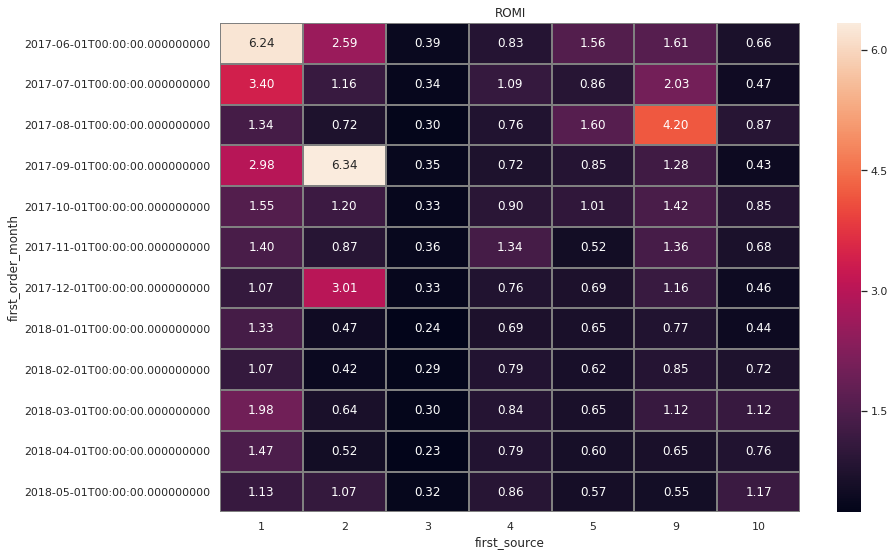

In [47]:
# построим тепловую карту
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(romi_per_source, annot=True, fmt='.2f', linewidths=1, linecolor='grey') ;

* Видим, что не все источники окупаются. Особенное выделяется источник 3, который за все время ни разу не окупился. Также можно заметить, что больше 3-4 источников в один месяц не окупались поэтому, возможно, стоит попробовать использовать меньшее число источник в один месяц тк остальные попросту не окупаются. Также выделяется исчтоник 2  ROMI которого, был больше единицы (окупался) в каждый из месяцев.

In [48]:
# усредним romi
romi_per_source.mean().sort_values(ascending=False)

first_source
1     2.080000
2     1.584167
9     1.416667
4     0.864167
5     0.848333
10    0.719167
3     0.315000
dtype: float64

* В среднем видим, что в среднем окупаются исчтоники 1 , 2 и 9. Только они имеют среднее значчение больше единицы. Однако это не значит , что нужно использовать только их. Источники 4 и 5 окупились лишь 2 и 3 раза соответсвтенно, а все остальное время принимали околоединичные значения и в какой то ситуции разово лучше использовать их.

### Вывод:

За весь шаг мы рассчитали множество важных метрик, построили отчеты, ответили на поставленные вопросы.
  Мы выяснили:
*  Что имеем в среднем 907 посетителей на сайте в день , 5716 посетителей в неделю и 23228 в месяц
* Выявили сезонность:ближе к концу года(начиная с октября) и в его первом месяце посещаемость наибольшая,а с апреля посещаемость падает
* Большинство пользователей совершает одну сессию в день продолжительностью около минуты
* Провевели когортный анализ и выяснили, что лучше всего мы удеживали пользователей пришедших с июня 2017 до до декабря 2017, потом коэффицент удежания снижался
* У большинства пользователей проходит 0-25 дней или от 0 до 20 минут между первым визитом и покупкой. Также видна очень малочисленная группа пользователей у которых проходит более 10000 минут или 175 дней. Следует изучить причины такой задержки
* В период июль-август, количество заказов снижалось и было минимальным. В период с августа до октября, количество заказов выросло более чем в 3 раза и к декабрю достигло максимума после которого опять начало снижаться. Это подверждает сезонность.
* В период с ноября до декабря средний чек вырос до 6 и в январе сразу упал ниже доростового уровня (2). Также заметно резкое снижение среднего чека в мае-июне до 3
* Больше всего денег пользователи когорт приносят в первый месяц. В последующие месяцы жизни когорты, пользователи приносят либо ноль , либо разово единичное значение.
* Больше всего денег мы потратили на источники 3, 2 и 5
* Больше всего тратили в период с августа до апреля, с июля до августа меньше всего.
* Окупаемыми источниками являются 1,2 и 9
* Источник 3 имеет самую высокую цену привлечения CAC и самую маленькую окупаемость ROMI - это невыгодный источник

<a id='Шаг3'></a>

### Шаг 3. Напишем общий вывод:

За весь проект мы
* изучили и предобработали данные
* расситали множество метрик, построили отчеты, ответили на поставленные вопросы.
На основе этого можем порекомендовать следующее:
* Выяснить причину снижение метрики Ratention Rate у когорт, пришедших в декабре 2017, январе 2018 и далее
* Следует более детально изучить категорию посетителей сайта посетители у которых c момента первого визита до заказа прошло до 175 дней и выяснить почему прошло так много времени, может были проблемы сайтом или необходимо настроить систему ретаргентига
* Причину резкого падения среднего чека с 6 до 3 в периода с дкабря по январь 
* На основе метрики ltv, посчитанной по когортам, самые прибыльные когорты от 2017-06-01 и 2017-09-01. Возможно к их участникам применялся какой то особый рекламный подход. Следует посмотреть, не использовалось ли  что-то необычное в работе с этими когортами.
* На основе ROMI логично порекомендовать больше денег вкладывать в источники 1,2 и 9, а снизить затраты на источникк 3 или отказаться от него. Попробовать не использовать больше 4х источников в один месяц.Оптимизировать затраты и число покупателей на источник и сделать их приближенными по остальным источникам к окупаемым источникам 1,2, и 9.